In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

# Read in Data

In [2]:
df_primary = pd.read_csv('kc_house_data_train.csv')
print(df_primary.shape)
df_primary.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# Data Scrubbing

In [3]:
working_DF_1 = pd.read_csv('kc_house_data_train.csv')
print(working_DF_1.shape)
working_DF_1.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
column_names = working_DF_1.columns
print(column_names)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
## checking the data for null and data types
working_DF_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [6]:
## dropping Unnamed: 0 
working_DF_1.drop(columns=['Unnamed: 0'], inplace=True)


In [7]:
working_DF_1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
## let's create a columns for month_sold and year_sold
from datetime import datetime

## Date format conversion
working_DF_1['date'] = [x[:8] for x in working_DF_1.date]
working_DF_1.date = working_DF_1.date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
working_DF_1.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# Exploratory Data Analysis

## Target Variable

#### Checking the summary statistics for price

In [9]:
working_DF_1['price'].describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

#### Showing the distribution of price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0b47d56a0>]],
      dtype=object)

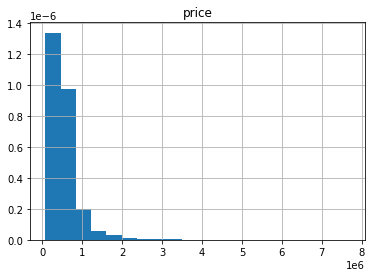

In [10]:
working_DF_1.hist(column=['price'], bins=20, density =True)

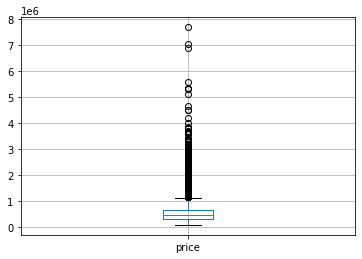

In [11]:
working_DF_1.boxplot(column=['price'])

A we can see there is fluxuation in price, but that is expepected as this is our target variable.

## Continous Variables

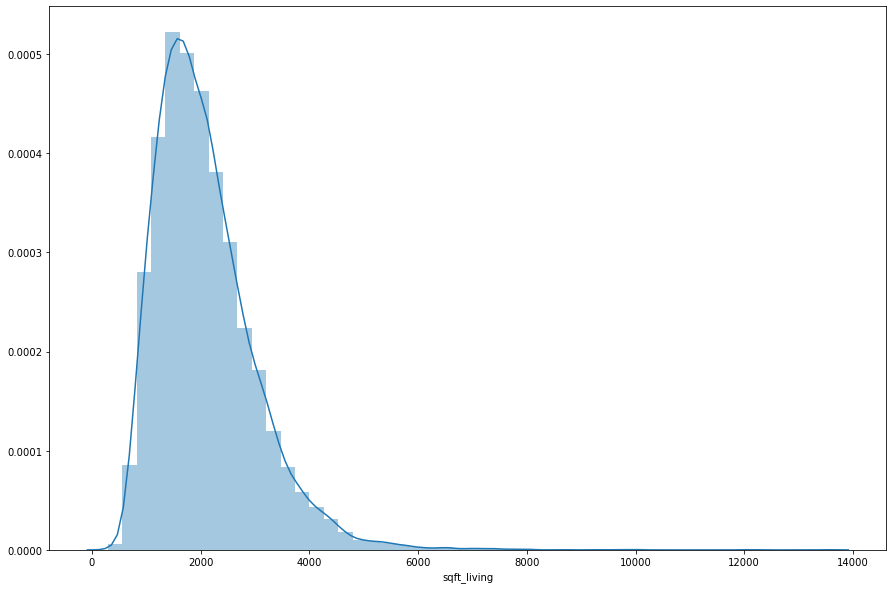

In [12]:
## sqft_living

fig,axes=plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.distplot(working_DF_1['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

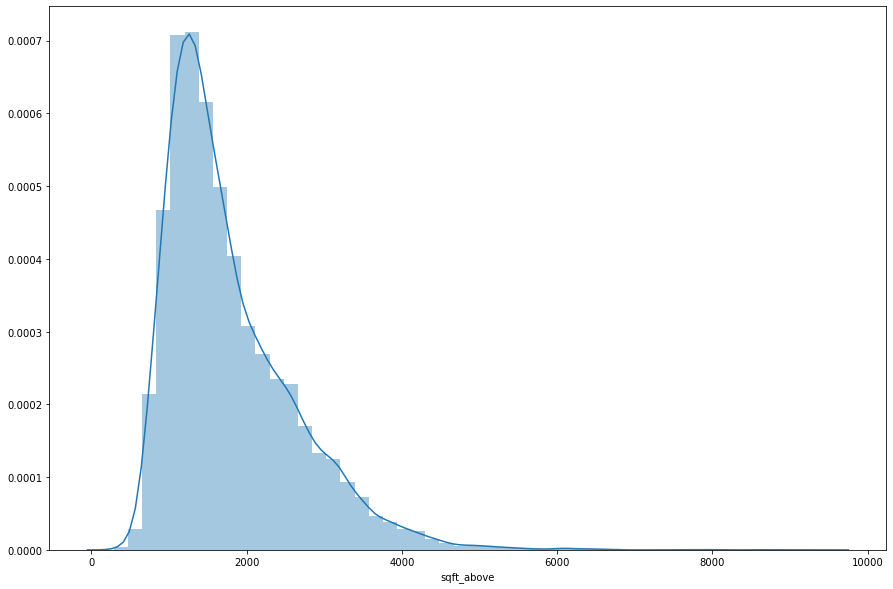

In [13]:
## sqft_above

fig,axes=plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.distplot(working_DF_1['sqft_above'], hist=True, kde=True, rug=False, label='sqft_above', norm_hist=True)

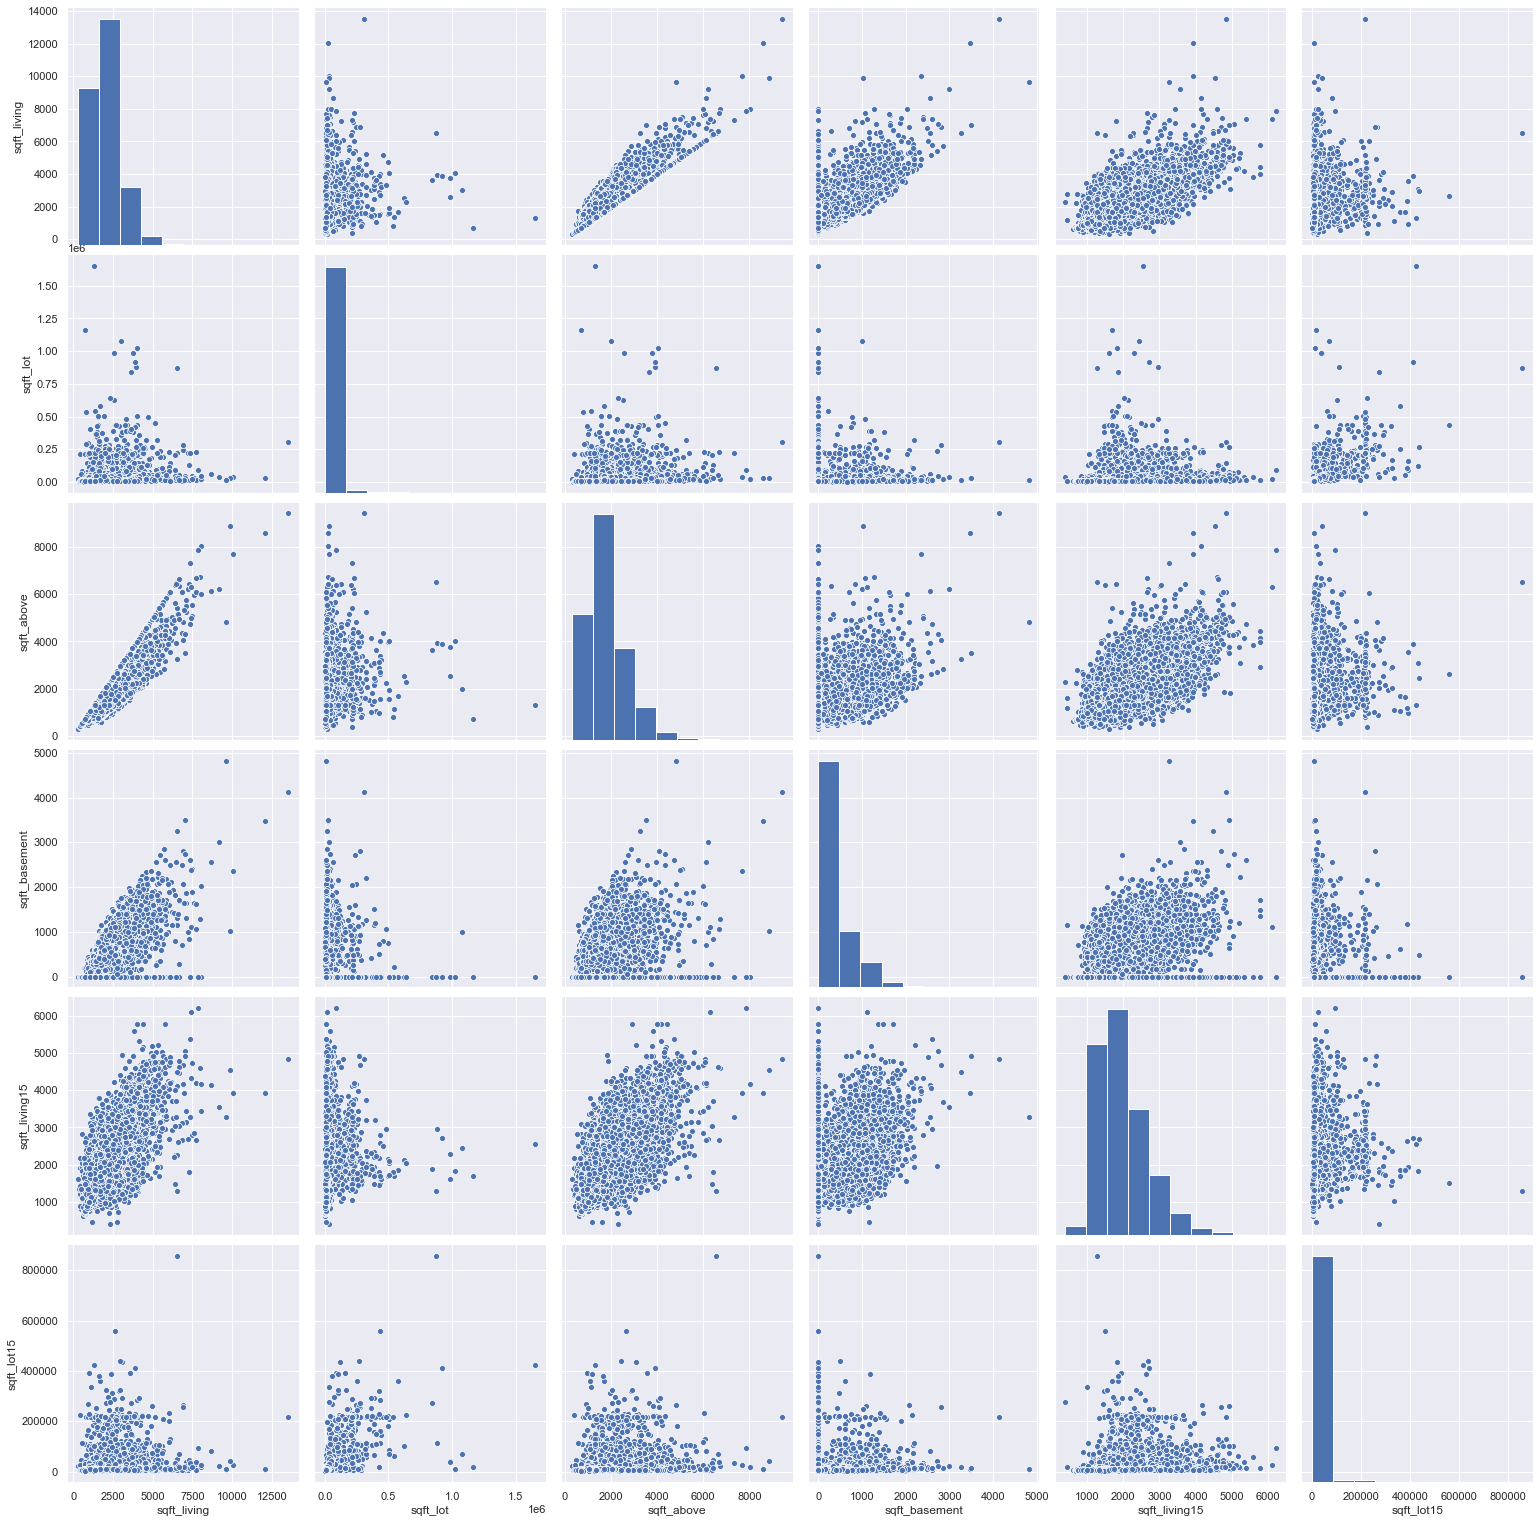

In [14]:
## Scatter plot to display
sns.set()
cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
sns.pairplot(working_DF_1[cols], size = 3.5)
plt.show();

There some skewedness in the data, but further investigation of the data to the target will help to express further relationship and outliers

## Price to Variable Relationship

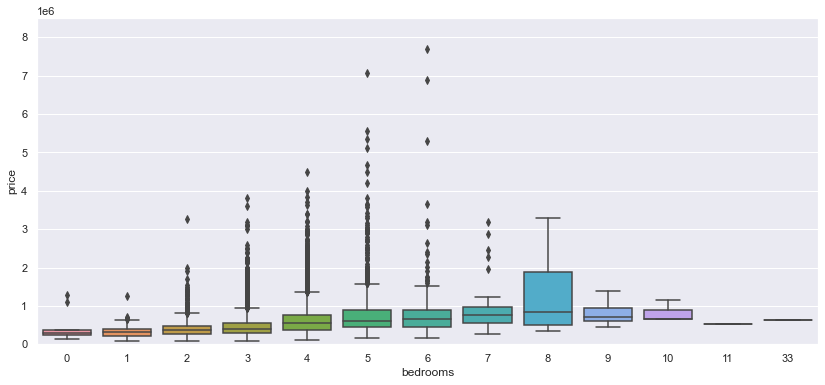

In [15]:
var = 'bedrooms'
data = pd.concat([working_DF_1['price'], working_DF_1[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8500000);

There seem to to be some errors or extreme out liers in 11 and 33. We will tackle that further during the data cleaning.

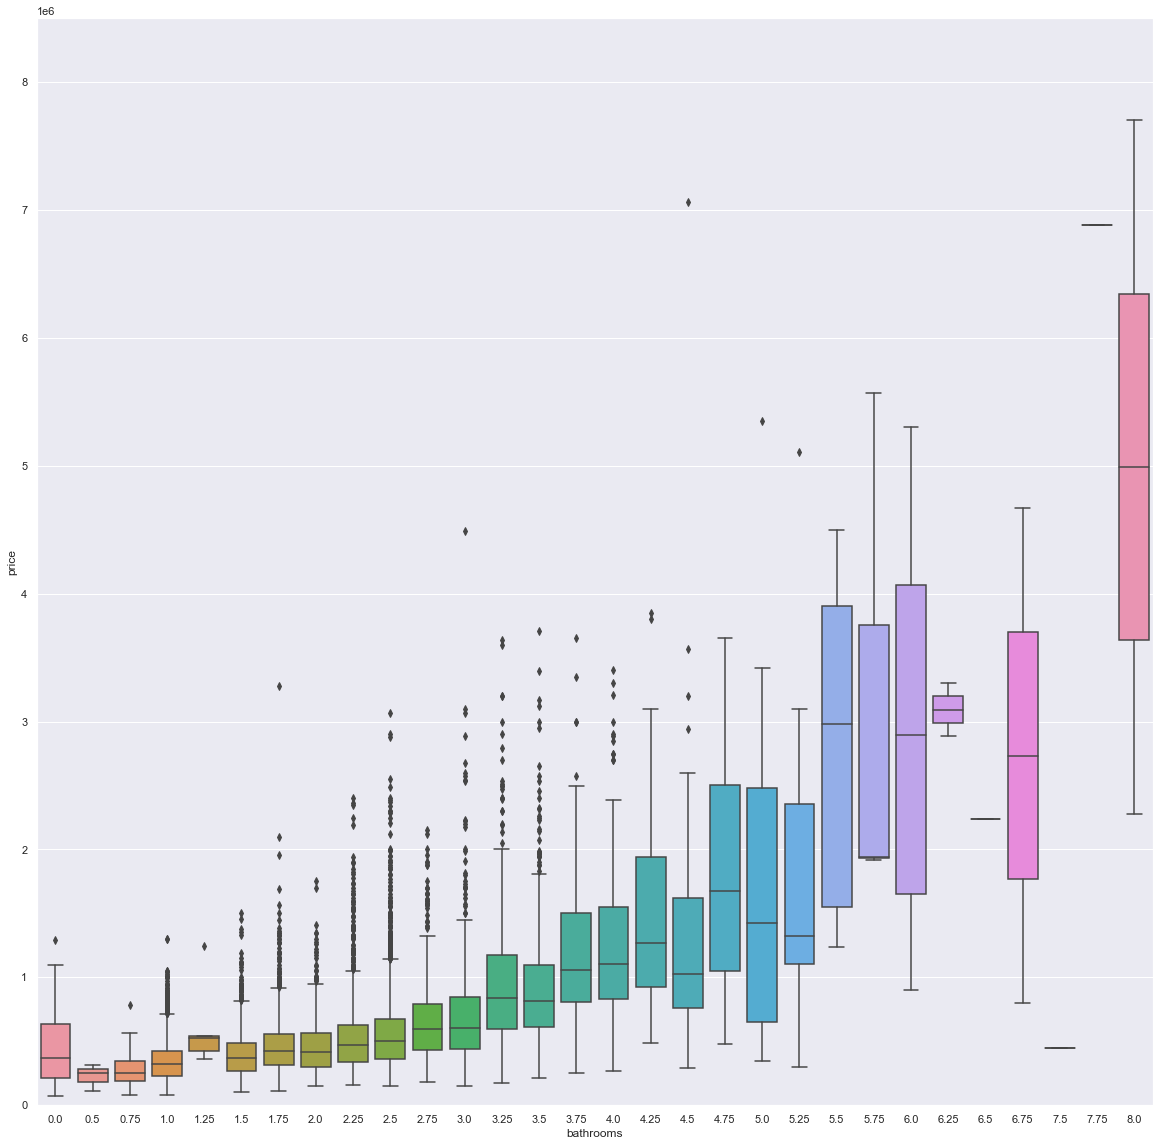

In [16]:
var = 'bathrooms'
data = pd.concat([working_DF_1['price'], working_DF_1[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8500000);

Strong realtionship to price in the mean values.

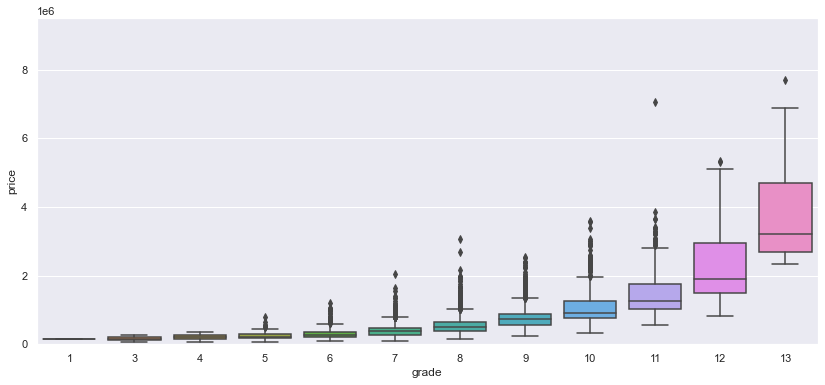

In [17]:
var = 'grade'
data = pd.concat([working_DF_1['price'], working_DF_1[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=working_DF_1)
fig.axis(ymin=0, ymax=9500000);

Strong relationship between grade and price. 

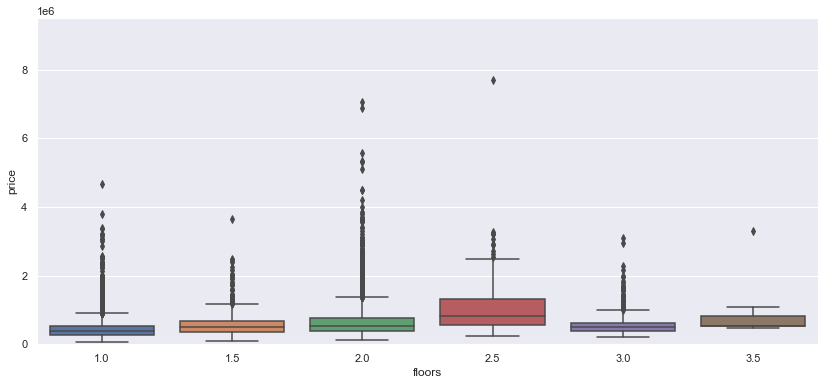

In [18]:
var = 'floors'
data = pd.concat([working_DF_1['price'], working_DF_1[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=working_DF_1)
fig.axis(ymin=0, ymax=9500000);

Categorical data could be used potentially as a categorical dummy variable.

In [19]:
## Let's inspect some of the columns.
## We can see some possible questionale outlifers, 11 and 33. 

working_DF_1['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

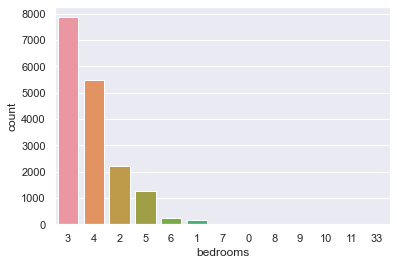

In [20]:
## checking bedroom values

sns.countplot(working_DF_1.bedrooms, order=working_DF_1['bedrooms'].value_counts().index)

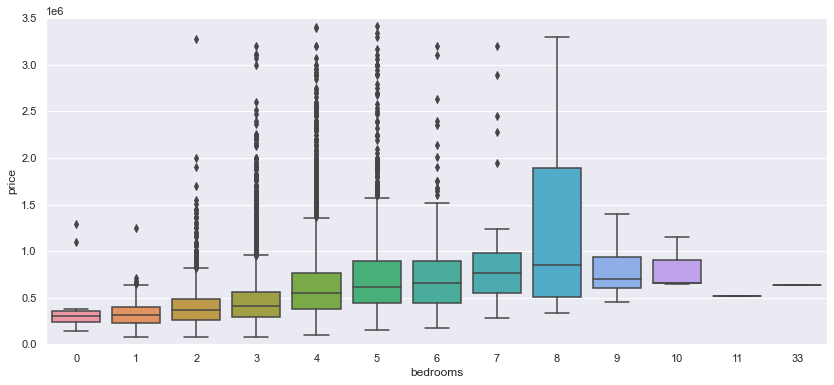

In [21]:
## Realtionship of bedroom to price
## Need to address the >10 bedrooms

var = 'bedrooms'
data = pd.concat([working_DF_1['price'], working_DF_1[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

In [22]:
working_DF_1[working_DF_1['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2356,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
3680,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
8597,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
11181,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
17114,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


In [23]:
## Looks like 11-33 bedrooms could be a possible mistake as bathrooms and sqt_living indicate possible typo error

# Correaltions

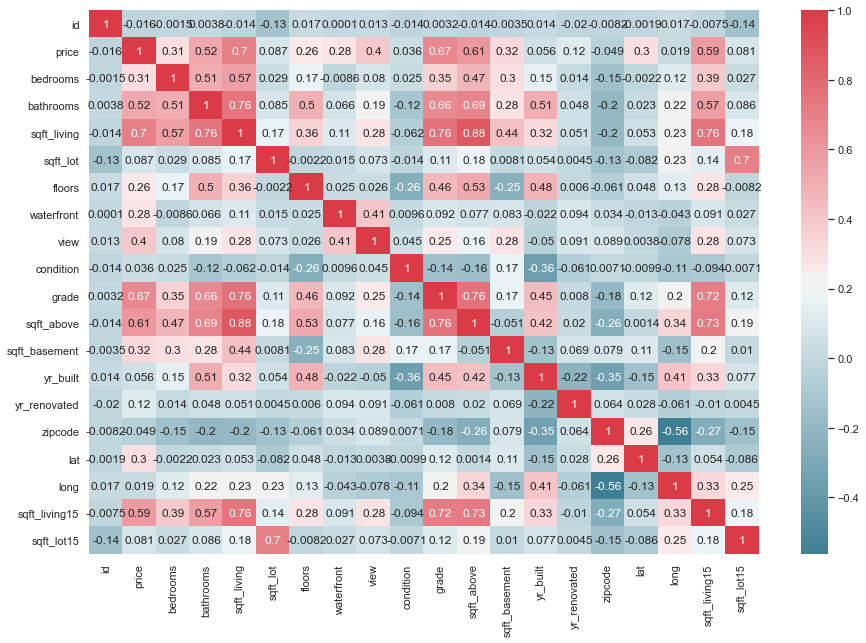

In [24]:
def correlation_heatmap(df1):
   _,ax=plt.subplots(figsize=(15,10))
   colormap=sns.diverging_palette(220,10,as_cmap=True)
   sns.heatmap(working_DF_1.corr(),annot=True,cmap=colormap)
   
correlation_heatmap(working_DF_1)


#### 1) Price has a strong correlation with sqft_living and grade

#### 2) Price has medium correlation with bedrooms, sqft_above, sqft_living15

#### 3) Price has low correlation with bedrooms, floors, sqft_basement, latitude

#### 4) Price has no significant relationship with sqft_lot, yr_built, long, sqft_lot15


# Creating features

In [25]:
from datetime import datetime
current_year = datetime.now().year

In [26]:
# creating a column for house_age

working_DF_1.yr_built = working_DF_1.yr_built.astype('int64')
working_DF_1['house_age'] = current_year - working_DF_1['yr_built']

In [27]:
working_DF_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,35
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,44
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,24
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,31
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,17


In [28]:
## creating a categorical column for house_age_cat

working_DF_1['house_age_cat'] = working_DF_1['house_age'].apply(lambda x: ('old' if x >= 50 else 'middle') if x >= 15 else 'new')

In [29]:
working_DF_1.house_age_cat.value_counts()

old       8299
middle    7225
new       1766
Name: house_age_cat, dtype: int64

In [30]:
working_DF_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,35,middle
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,44,middle
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,24,middle
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,31,middle
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,17,middle


In [31]:
## checking the average price of categorical house age to the mean

working_DF_1.groupby(['house_age_cat'])['price'].mean()

house_age_cat
middle    562328.159585
new       624113.464892
old       504203.092421
Name: price, dtype: float64

In [32]:
### dealing with bedroom outliers

working_DF_1.info()

working_DF_1[working_DF_1['bedrooms'] >= 10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17290 non-null  int64         
 1   date           17290 non-null  datetime64[ns]
 2   price          17290 non-null  float64       
 3   bedrooms       17290 non-null  int64         
 4   bathrooms      17290 non-null  float64       
 5   sqft_living    17290 non-null  int64         
 6   sqft_lot       17290 non-null  int64         
 7   floors         17290 non-null  float64       
 8   waterfront     17290 non-null  int64         
 9   view           17290 non-null  int64         
 10  condition      17290 non-null  int64         
 11  grade          17290 non-null  int64         
 12  sqft_above     17290 non-null  int64         
 13  sqft_basement  17290 non-null  int64         
 14  yr_built       17290 non-null  int64         
 15  yr_renovated   1729

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat
2356,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,103,old
3680,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,108,old
8597,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,74,old
11181,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,13,new
17114,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,63,old


In [33]:
## looking at 33 bedrooms looks to be an error as sqft_living and floors do not align. It seems to be a 3 bedroom home.

working_DF_1.replace({'bedrooms': {33: 3}}, inplace=True)

In [34]:
## we know there is a high correlation between price and bathrooms. 
## However, there seems to be eight homes with zero bathrooms

## treat as a continous variable

working_DF_1[working_DF_1.bathrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat
483,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,31,middle
1120,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,31,middle
3032,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,25,middle
5424,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,15,middle
9060,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,55,old
9286,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,31,middle
10067,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,58,old
12982,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,73,old


In [35]:
## replace the zero bathrooms with 0.25, it is not a full bath but may have either a sink, shower, or toilet 
working_DF_1.replace({'bathrooms': {0: 0.25}}, inplace=True)
working_DF_1.bathrooms.value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.25       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

In [36]:
working_DF_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,35,middle
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,44,middle
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,24,middle
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,31,middle
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,17,middle


In [37]:
##outdoor space to see the aviable space outside is the lsqft_lot minus the house and divided by the floors

working_DF_1['outdoor_space'] = working_DF_1['sqft_lot'] - (working_DF_1['sqft_above']/working_DF_1['floors'])
working_DF_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat,outdoor_space
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,35,middle,7858.0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,44,middle,4900.0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,24,middle,9008.0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,31,middle,12328.0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,17,middle,4101.0


In [38]:
## we ahve a negaive value that needs to be explored

working_DF_1['outdoor_space'].describe()

count    1.729000e+04
mean     1.400309e+04
std      4.221535e+04
min     -6.500000e+01
25%      4.020750e+03
50%      6.396000e+03
75%      9.344000e+03
max      1.650059e+06
Name: outdoor_space, dtype: float64

In [39]:
working_DF_1[working_DF_1.outdoor_space <= 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat,outdoor_space
2392,3277800845,2014-07-11,370000.0,3,1.0,1170,1105,1.0,0,0,3,7,1170,0,1965,0,98126,47.5448,-122.375,1380,1399,56,old,-65.0


In [40]:
working_DF_1[working_DF_1.sqft_lot == 1105]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat,outdoor_space
2392,3277800845,2014-07-11,370000.0,3,1.0,1170,1105,1.0,0,0,3,7,1170,0,1965,0,98126,47.5448,-122.375,1380,1399,56,old,-65.0


In [41]:
##based on zillow 1150 seems to be a typo and was corred to 1200

working_DF_1.replace({'sqft_lot': {1105: 1200}}, inplace=True)

In [42]:
working_DF_1['outdoor_space'].describe()

count    1.729000e+04
mean     1.400309e+04
std      4.221535e+04
min     -6.500000e+01
25%      4.020750e+03
50%      6.396000e+03
75%      9.344000e+03
max      1.650059e+06
Name: outdoor_space, dtype: float64

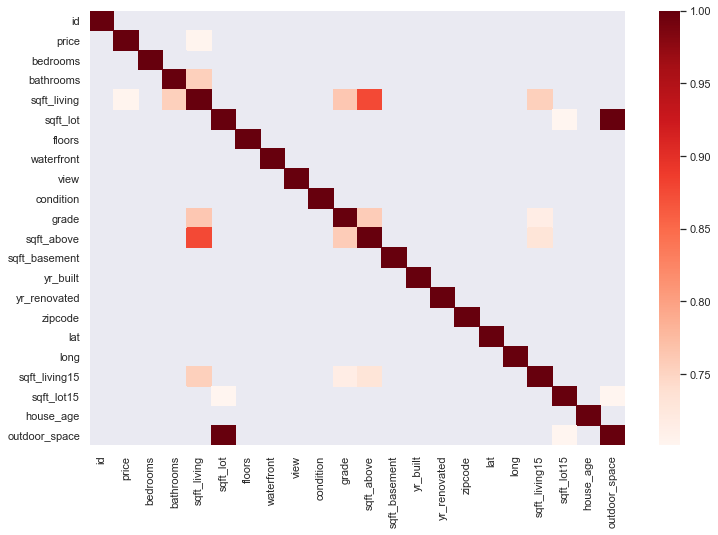

In [43]:
##Taking another gander of potential correlation
corr = working_DF_1.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [44]:
#Creating another variable floors and creating a binary variable called multilevel

working_DF_1['multilevel'] = np.where(working_DF_1['floors']> 1, 1, 0)
working_DF_1['multilevel'].value_counts()

1    8684
0    8606
Name: multilevel, dtype: int64

In [45]:
working_DF_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat,outdoor_space,multilevel
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,35,middle,7858.0,1
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,44,middle,4900.0,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,24,middle,9008.0,1
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,31,middle,12328.0,1
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,17,middle,4101.0,1


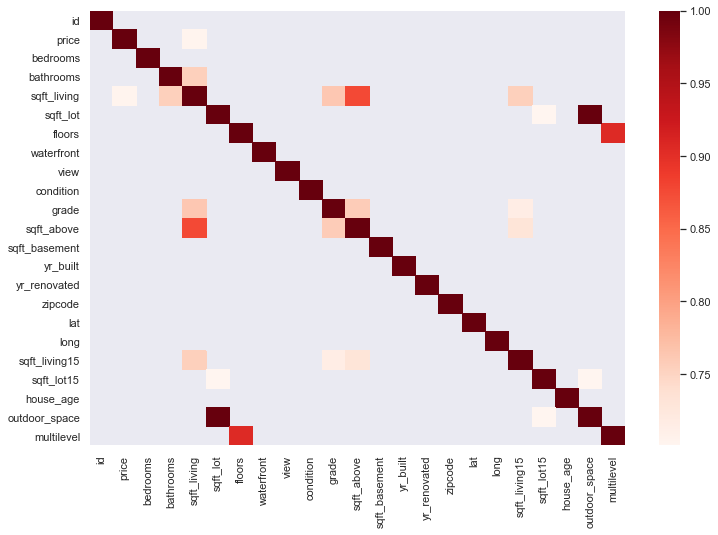

In [46]:
corr = working_DF_1.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [47]:
working_DF_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17290 non-null  int64         
 1   date           17290 non-null  datetime64[ns]
 2   price          17290 non-null  float64       
 3   bedrooms       17290 non-null  int64         
 4   bathrooms      17290 non-null  float64       
 5   sqft_living    17290 non-null  int64         
 6   sqft_lot       17290 non-null  int64         
 7   floors         17290 non-null  float64       
 8   waterfront     17290 non-null  int64         
 9   view           17290 non-null  int64         
 10  condition      17290 non-null  int64         
 11  grade          17290 non-null  int64         
 12  sqft_above     17290 non-null  int64         
 13  sqft_basement  17290 non-null  int64         
 14  yr_built       17290 non-null  int64         
 15  yr_renovated   1729

In [48]:
## creating a new binary variables called basement and renovated
working_DF_1['basement'] = np.where(working_DF_1['sqft_basement']> 1, 1, 0)
working_DF_1['basement'].value_counts()


0    10484
1     6806
Name: basement, dtype: int64

In [49]:
working_DF_1['renovated'] = np.where(working_DF_1['yr_renovated']> 1, 1, 0)
working_DF_1['renovated'].value_counts()

0    16564
1      726
Name: renovated, dtype: int64

In [50]:
working_DF_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat,outdoor_space,multilevel,basement,renovated
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,35,middle,7858.0,1,0,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,44,middle,4900.0,0,1,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,24,middle,9008.0,1,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,31,middle,12328.0,1,0,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,17,middle,4101.0,1,0,0


In [51]:
working_DF_1.shape

(17290, 27)

In [52]:
## droping date since we have house_age
working_DF_1.drop('date', axis=1, inplace=True)



In [53]:
## dropping the sqft_basement since we have basment
working_DF_1.drop('sqft_basement', axis=1, inplace=True)

## dropping yr_renovated since we have renovated
working_DF_1.drop('yr_renovated', axis=1, inplace=True)

In [54]:
## droping id 
working_DF_1.drop(columns=['id'], inplace=True)

In [55]:
working_DF_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,house_age_cat,outdoor_space,multilevel,basement,renovated
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,1986,98058,47.4388,-122.162,2390,7700,35,middle,7858.0,1,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1977,98115,47.6784,-122.285,2370,6283,44,middle,4900.0,0,1,0
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,1997,98006,47.5646,-122.129,3710,9685,24,middle,9008.0,1,0,0
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,1990,98034,47.6995,-122.228,4050,14226,31,middle,12328.0,1,0,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,2004,98052,47.6647,-122.083,2250,4050,17,middle,4101.0,1,0,0


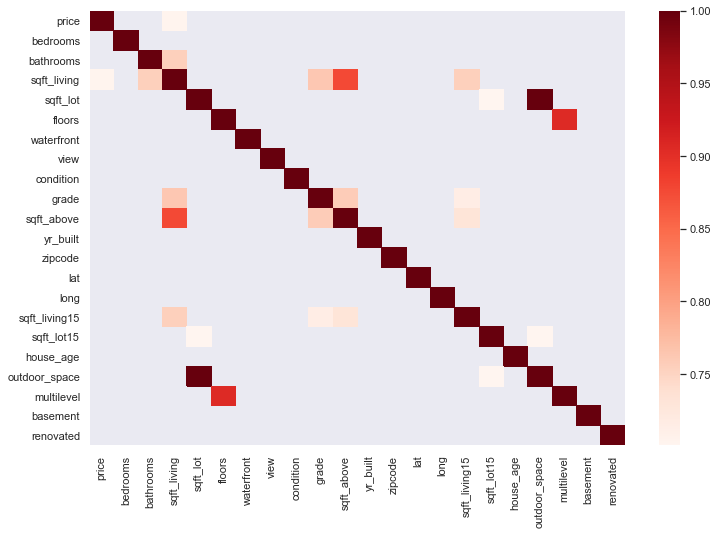

In [56]:
corr = working_DF_1.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [57]:
## after looking at the correlation heat map i will be droping the following

working_DF_1.drop(columns=['floors', 'yr_built', 'lat', 'long', 'sqft_lot'], inplace=True)

In [58]:
working_DF_1.shape

(17290, 18)

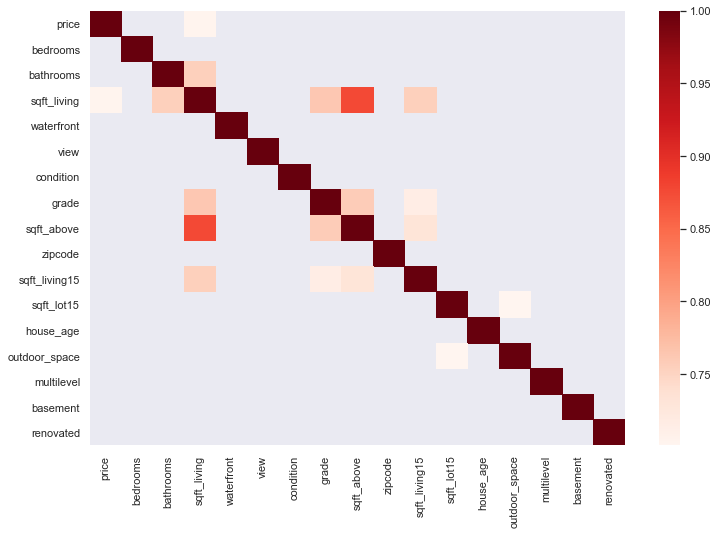

In [59]:
corr = working_DF_1.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [60]:
### removing features that are highly correlated
## floors, sqft_lot

working_DF_1.drop(columns=['sqft_above'], inplace=True)


In [61]:
working_DF_1.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_lot15,house_age,house_age_cat,outdoor_space,multilevel,basement,renovated
0,365000.0,4,2.25,2070,0,0,4,8,98058,2390,7700,35,middle,7858.0,1,0,0
1,865000.0,5,3.00,2900,0,0,5,8,98115,2370,6283,44,middle,4900.0,0,1,0
2,1038000.0,4,2.50,3770,0,2,3,11,98006,3710,9685,24,middle,9008.0,1,0,0
3,1490000.0,3,3.50,4560,0,2,3,12,98034,4050,14226,31,middle,12328.0,1,0,0
4,711000.0,3,2.50,2550,0,0,3,9,98052,2250,4050,17,middle,4101.0,1,0,0


In [62]:

working_DF_1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'house_age', 'house_age_cat', 'outdoor_space', 'multilevel', 'basement',
       'renovated'],
      dtype='object')

# Statistical Testing

In [63]:
import scipy as sp
import scipy.stats as stats

This is a difference of means for two samples. Two sample, T-Test. 


 Ho: mu_with_basement = mu_without_basment 
 
 Ha: mu_with_basment != mu_without_basment

In [64]:
without_basement= working_DF_1[working_DF_1.basement == 0]['price']
with_basement = working_DF_1[working_DF_1.basement == 1]['price']

t, p =stats.ttest_ind(with_basement , without_basement, equal_var=True)

In [65]:
t, p

(23.64189256331611, 1.2107663322174255e-121)

In [66]:
p > 0.05

False

** We reject the null hypothesis that the mean price between having a basement and not having a basement is the same. This is due to p-value not being greater than alpha.


This is a difference of means for two samples. Two sample, T-Test. 


 Ho: mu_was_renovated = mu_not_renovated 
 
 Ha: mu_was_renovated != mu_not_renovated

In [67]:
not_renovated = working_DF_1[working_DF_1.renovated == 0]['price']
was_renovated = working_DF_1[working_DF_1.renovated == 1]['price']

t, p =stats.ttest_ind(was_renovated , not_renovated, equal_var=True)

In [68]:
t, p

(15.544856792041145, 4.007705820364685e-54)

In [69]:
p > 0.05

False

We reject the null hypothesis that the mean price between renovated and not renovated is the same. This is due to p-value not being greater than alpha.

# Baseline1

In [70]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'house_age', 'outdoor_space',
       'multilevel', 'basement', 'renovated']

df_features = working_DF_1[features]

target = working_DF_1['price']

In [71]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)


#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 219918.4245125626


In [72]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 219222.06716903482
Training:  219918 vs. Testing:  219222


Looking at the baseline RMSE with just the features we see 219k is the baseline RSME will be working to drop

## Dummy Variables

In [73]:
working_DF_1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'house_age', 'house_age_cat', 'outdoor_space', 'multilevel', 'basement',
       'renovated'],
      dtype='object')

In [74]:
## Creating some dummy varibes from variables that are categorical

df_dum = pd.get_dummies(working_DF_1, columns=['condition', 'grade', 'zipcode'], drop_first=True)

In [75]:
df_dum.shape

(17290, 98)

In [76]:
## dropping price from our dummy variables

df_dum.drop(columns=['price'], inplace=True)

In [77]:
df_dum.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'sqft_living15', 'sqft_lot15', 'house_age', 'house_age_cat',
       'outdoor_space', 'multilevel', 'basement', 'renovated', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98

####Narrowing down features to train my second model to seem if my RSME with the features listed below will help reduce the RSME


In [78]:

features = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view'
            , 'sqft_living15', 'sqft_lot15', 'house_age', 
        'outdoor_space', 'multilevel', 'basement', 'renovated',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

df_features = df_dum[features]

target = working_DF_1['price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)


#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 153387.89343420544


In [80]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 147726.41848619
Training:  153387 vs. Testing:  147726


Based on the features listed above in my features variable, we were able to redue the RSME and are moving in a good trend

In [81]:
## checking for correlation inte current features 
# Create correlation matrix
df_dum.corr()

,bedrooms,bathrooms,sqft_living,waterfront,view,sqft_living15,sqft_lot15,house_age,outdoor_space,multilevel,basement,renovated,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
bedrooms,1.000000,0.523722,0.588536,-0.008668,0.082724,0.401073,0.028038,-0.159936,0.026533,0.225483,0.163935,0.014182,-0.052935,0.008839,-0.006531,0.017442,-0.027963,-0.076783,-0.118132,-0.243196,-0.103991,0.072530,0.164262,0.138973,0.120530,0.062352,0.042565,-0.006824,0.000536,0.062804,0.046070,0.074479,0.036197,0.047027,-0.003337,0.022033,-0.030332,0.000865,-0.028711,0.006252,-0.002174,0.023532,0.013504,0.007075,0.015669,0.016193,-0.003450,0.034165,0.019330,0.012408,0.039206,0.083831,0.002537,-0.019113,0.048658,-0.023909,-0.013812,0.008929,0.025046,0.054882,0.017401,-0.049345,0.007035,0.039765,0.067117,0.030244,0.015401,-0.004354,-0.062170,0.018625,-0.039997,-0.049907,-0.020437,-0.011346,0.017657,-0.030342,-0.040513,-0.062638,-0.050439,-0.007712,-0.023621,-0.023026,-0.074663,-0.035564,-0.048955,-0.009085,-0.030634,-0.011386,-0.007997,0.002041,-0.049054,-0.005014,-0.004412,0.002075,-0.022387,-0.017838
bathrooms,0.523722,1.000000,0.755527,0.065860,0.188941,0.568320,0.086559,-0.508011,0.081741,0.461988,0.162449,0.047607,-0.076801,0.188781,-0.164768,-0.033587,-0.022514,-0.055226,-0.139576,-0.364600,-0.309454,0.187161,0.265767,0.270248,0.243032,0.163477,0.104292,-0.035304,-0.006708,0.063581,0.035875,0.084287,-0.000826,-0.003521,-0.002349,0.019804,-0.006965,0.023265,-0.027755,-0.007746,0.008548,0.062956,0.004841,0.073438,0.005763,0.007222,-0.043468,0.043275,-0.001796,0.057946,0.074056,0.085948,0.000291,-0.002037,0.055596,0.061856,-0.020076,-0.011099,-0.004653,0.045462,0.064198,-0.019253,0.018573,0.075749,0.100508,0.044896,0.024553,0.014148,-0.039465,0.006241,-0.050069,-0.011093,-0.021930,0.004000,0.039077,-0.054247,-0.022459,-0.066012,-0.078819,0.012840,-0.008486,-0.049637,-0.069948,-0.074594,-0.031232,-0.002818,-0.075185,-0.024981,-0.059442,-0.025888,-0.099342,-0.008365,-0.052244,-0.024161,-0.050690,0.010948
sqft_living,0.588536,0.755527,1.000000,0.109738,0.283336,0.755066,0.179570,-0.319397,0.160166,0.373297,0.203606,0.051159,-0.065621,0.104360,-0.084267,-0.021026,-0.017379,-0.054949,-0.128932,-0.311957,-0.354918,0.070028,0.318358,0.362762,0.346887,0.248618,0.153617,-0.048220,-0.017726,0.113783,0.058706,0.128092,0.000534,0.005764,0.006015,0.016749,0.002062,0.012361,-0.030438,-0.014144,0.018768,0.060564,0.006449,0.029388,-0.012867,-0.015812,-0.031718,0.049177,-0.018771,0.013965,0.096565,0.125568,-0.021005,-0.006935,0.053267,0.081287,-0.033504,-0.007597,-0.006954,0.052684,0.062005,-0.014292,0.033239,0.088892,0.128044,0.082587,0.019379,0.012326,-0.075749,0.010088,-0.080578,-0.058582,-0.038305,-0.000166,0.055769,-0.046046,-0.031276,-0.074852,-0.071109,-0.005669,-0.039003,-0.044765,-0.073066,-0.076949,-0.041202,-0.013726,-0.057380,-0.026674,-0.048775,0.001784,-0.074257,0.015918,-0.041365,-0.025332,-0.041584,0.013689
waterfr

## Poly variables

In [82]:
df_features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'sqft_living15', 'sqft_lot15', 'house_age', 'outdoor_space',
       'multilevel', 'basement', 'renovated', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98

In [83]:
#interact = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
#interact_data = interact.fit_transform(df_features)
#interact_columns = interact.get_feature_names(df_features.columns)
#df_interact= pd.DataFrame(interact_data, columns=interact_columns)
#df_interact.head()

In [84]:
contin_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront','view','sqft_living15', 'sqft_lot15']

In [85]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features[contin_vars])
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)


In [86]:
df_poly2.shape
df_poly2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'sqft_living15', 'sqft_lot15', 'bedrooms^2', 'bedrooms bathrooms',
       'bedrooms sqft_living', 'bedrooms waterfront', 'bedrooms view',
       'bedrooms sqft_living15', 'bedrooms sqft_lot15', 'bathrooms^2',
       'bathrooms sqft_living', 'bathrooms waterfront', 'bathrooms view',
       'bathrooms sqft_living15', 'bathrooms sqft_lot15', 'sqft_living^2',
       'sqft_living waterfront', 'sqft_living view',
       'sqft_living sqft_living15', 'sqft_living sqft_lot15', 'waterfront^2',
       'waterfront view', 'waterfront sqft_living15', 'waterfront sqft_lot15',
       'view^2', 'view sqft_living15', 'view sqft_lot15', 'sqft_living15^2',
       'sqft_living15 sqft_lot15', 'sqft_lot15^2'],
      dtype='object')

In [87]:
cat_vars = [x for x in df_features.columns if x not in contin_vars]

In [88]:
df_poly_cat = pd.concat([df_poly2, df_features[cat_vars]] , axis =1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df_poly_cat, target, random_state=9,test_size=0.2)


In [90]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly_cat.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly_cat.columns)

In [91]:
X_train.shape

(13832, 124)

In [92]:
X_test.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,sqft_living15,sqft_lot15,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms waterfront,bedrooms view,bedrooms sqft_living15,bedrooms sqft_lot15,bathrooms^2,bathrooms sqft_living,bathrooms waterfront,bathrooms view,bathrooms sqft_living15,bathrooms sqft_lot15,sqft_living^2,sqft_living waterfront,sqft_living view,sqft_living sqft_living15,sqft_living sqft_lot15,waterfront^2,waterfront view,waterfront sqft_living15,waterfront sqft_lot15,view^2,view sqft_living15,view sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2,house_age,outdoor_space,multilevel,basement,renovated,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.698273,0.832159,-0.512760,-0.09276,-0.307932,-0.550724,-0.143101,0.574226,0.838763,-0.214139,-0.088082,-0.294671,-0.136446,-0.084610,0.677340,-0.120059,-0.085807,-0.28042,-0.021083,-0.055863,-0.464911,-0.082659,-0.267913,-0.534109,-0.200454,-0.09276,-0.091696,-0.088712,-0.071607,-0.263811,-0.286286,-0.12598,-0.549329,-0.212152,-0.111670,-0.380503,-0.090657,-1.001592,1.240342,-0.207884,-0.089943,-1.360219,-0.595164,3.397108,-0.012026,-0.035079,-0.105409,-0.325893,1.187685,-0.62462,-0.371692,-0.233128,-0.135395,-0.067101,-0.025516,-0.09588,-0.113852,-0.1177,-0.089534,-0.153892,-0.085336,-0.114825,-0.064891,-0.097026,-0.077697,-0.093155,-0.109539,-0.158506,-0.060834,-0.140296,-0.110883,-0.120818,-0.107493,-0.11547,-0.077225,6.797661,-0.159462,-0.163236,-0.045038,-0.118015,-0.161830,-0.101118,-0.165324,-0.138951,-0.116111,-0.138138,-0.153152,-0.150158,-0.122653,-0.07482,-0.110883,-0.141364,-0.131181,-0.095109,-0.129748,-0.06818,-0.169207,-0.098906,-0.123862,-0.110549,-0.088295,-0.070806,-0.114825,-0.165555,-0.125951,-0.163236,-0.152408,-0.087459,-0.11989,-0.134004,-0.1283,-0.151911,-0.114502,-0.124462,-0.1177,-0.04964,-0.140296,-0.107149,-0.113852,-0.114177,-0.110883,-0.080928,-0.112542,-0.128009
1,-0.404297,-0.143797,-0.512760,-0.09276,-0.307932,-0.550724,0.110137,-0.471769,-0.349900,-0.541103,-0.088082,-0.294671,-0.580156,0.040272,-0.281079,-0.411957,-0.085807,-0.28042,-0.430084,0.043229,-0.464911,-0.082659,-0.267913,-0.534109,-0.067411,-0.09276,-0.091696,-0.088712,-0.071607,-0.263811,-0.286286,-0.12598,-0.549329,-0.050816,-0.088108,0.131503,-0.052671,-1.001592,-0.806229,-0.207884,-0.089943,-1.360219,1.680210,-0.294368,-0.012026,-0.035079,-0.105409,-0.325893,1.187685,-0.62462,-0.371692,-0.233128,-0.135395,-0.067101,-0.025516,-0.09588,-0.113852,-0.1177,-0.089534,-0.153892,-0.085336,-0.114825,-0.064891,-0.097026,-0.077697,-0.093155,-0.109539,-0.158506,-0.060834,-0.140296,-0.110883,-0.120818,-0.107493,-0.11547,-0.077225,-0.147109,-0.159462,-0.163236,-0.045038,-0.118015,6.179331,-0.101118,-0.165324,-0.138951,-0.116111,-0.138138,-0.153152,-0.150158,-0.122653,-0.07482,-0.110883,-0.141364,-0.131181,-0.095109,-0.129748,-0.06818,-0.169207,-0.098906,-0.123862,-0.110549,-0.088295,-0.070806,-0.114825,-0.165555,-0.125951

In [93]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 141195.56614459504


In [94]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 142061.0148086801
Training:  141195 vs. Testing:  142061


After testing the model for a third time a very nice leap from a training RSME of 153k to 139k. With some feature elimation of the orginal dataset and engineering of poly-interaction our model is responding well to our current features at this point. However,we will still use some feature selection methods to see how we could best optimize by dropping some features.

In [95]:
df_poly_cat.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,sqft_living15,sqft_lot15,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms waterfront,bedrooms view,bedrooms sqft_living15,bedrooms sqft_lot15,bathrooms^2,bathrooms sqft_living,bathrooms waterfront,bathrooms view,bathrooms sqft_living15,bathrooms sqft_lot15,sqft_living^2,sqft_living waterfront,sqft_living view,sqft_living sqft_living15,sqft_living sqft_lot15,waterfront^2,waterfront view,waterfront sqft_living15,waterfront sqft_lot15,view^2,view sqft_living15,view sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2,house_age,outdoor_space,multilevel,basement,renovated,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,4.0,2.25,2070.0,0.0,0.0,2390.0,7700.0,16.0,9.0,8280.0,0.0,0.0,9560.0,30800.0,5.0625,4657.5,0.0,0.0,5377.5,17325.0,4284900.0,0.0,0.0,4947300.0,15939000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5712100.0,18403000.0,59290000.0,35,7858.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,3.00,2900.0,0.0,0.0,2370.0,6283.0,25.0,15.0,14500.0,0.0,0.0,11850.0,31415.0,9.0000,8700.0,0.0,0.0,7110.0,18849.0,8410000.0,0.0,0.0,6873000.0,18220700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5616900.0,14890710.0,39476089.0,44,4900.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.0,2.50,3770.0,0.0,2.0,3710.0,9685.0,16.0,10.0,15080.0,0.0,8.0,14840.0,38740.0,6.2500,9425.0,0.0,5.0,9275.0,24212.5,14212900.0,0.0,7540.0,13986700.0,36512450.0,0.0,0.0,0.0,0.0,4.0,7420.0,19370.0,13764100.0,35931350.0,93799225.0,24,9008.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,3.50,4560.0,0.0,2.0,4050.0,14226.0,9.0,10.5,13680.0,0.0,6.0,12150.0,42678.0,12.2500,15960.0,0.0,7.0,14175.0,49791.0,20793600.0,0.0,9120.0,18468000.0,64870560.0,0.0,0.0,0.0,0.0,4.0,8100.0,28452.0,16402500.0,57615300.0,202379076.0,31,12328.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,2.50,2550.0,0.0,0.0,2250.0,4050.0,9.0,7.5,7650.0,0.0,0.0,6750.0,12150.0,6.2500,6375.0,0.0,0.0,5625.0,10125.0,6502500.0,0.0,0.0,5737500.0,10327500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5062500.0,9112500.0,16402500.0,17,4101.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Selection

### F Test

In [96]:
X_train.shape

(13832, 124)

In [97]:
df_poly_cat.shape

(17290, 124)

In [98]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7fb0b9a5c670>)

In [99]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [100]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [101]:
list(removed_columns)

['sqft_lot15',
 'bedrooms sqft_lot15',
 'bathrooms sqft_lot15',
 'sqft_living sqft_lot15',
 'waterfront view',
 'waterfront sqft_lot15',
 'view sqft_lot15',
 'sqft_living15 sqft_lot15',
 'sqft_lot15^2',
 'house_age',
 'outdoor_space',
 'multilevel',
 'basement',
 'renovated',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_8',
 'grade_9',
 'grade_13',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058'

In [102]:
len(removed_columns)

94

In [103]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 225025.93575561343
Testing Root Mean Squared Error: 221126.29996596416


In [104]:
list(zip(selected_columns, lm_kbest.coef_))

[('bedrooms', -44533.89132109599),
 ('bathrooms', 28904.461085214967),
 ('sqft_living', 83935.52983823419),
 ('waterfront', -29051.389618546316),
 ('view', 6633.957744395635),
 ('sqft_living15', 34002.6760348375),
 ('bedrooms^2', 51628.677420398904),
 ('bedrooms bathrooms', -119330.01874188028),
 ('bedrooms sqft_living', -42372.33891630526),
 ('bedrooms waterfront', 12343.39224518803),
 ('bedrooms view', 5718.679279015432),
 ('bedrooms sqft_living15', 102942.44218824702),
 ('bathrooms^2', 83820.41209388534),
 ('bathrooms sqft_living', 96717.73705835165),
 ('bathrooms waterfront', 1730.7823802517137),
 ('bathrooms view', 40062.33759005239),
 ('bathrooms sqft_living15', -118955.98076823346),
 ('sqft_living^2', 120393.1077367976),
 ('sqft_living waterfront', 82957.63090384059),
 ('sqft_living view', -96142.6882373823),
 ('sqft_living sqft_living15', -84142.91803737181),
 ('waterfront^2', -29051.389618546524),
 ('waterfront sqft_living15', 29786.432917308375),
 ('view^2', -6415.03454802666

In [105]:
print('Ploy_3: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Ploy_3:  142061.0148086801 
 KBest:    221126.29996596416 



In comparison to our inital poly test, the KBest did not perform so well. Keeping in consider, lets try some other feature selection methods.

### Recursive Feature Elimination

In [106]:
from sklearn.feature_selection import RFECV

In [107]:
ols = LinearRegression()

In [108]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)


Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fit

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [109]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [110]:
list(removed_rfe)

['bedrooms',
 'bathrooms',
 'view',
 'sqft_living15',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms sqft_lot15',
 'bathrooms^2',
 'bathrooms view',
 'bathrooms sqft_living15',
 'bathrooms sqft_lot15',
 'sqft_living sqft_living15',
 'waterfront view',
 'waterfront sqft_lot15',
 'view sqft_lot15',
 'sqft_living15^2',
 'sqft_living15 sqft_lot15',
 'sqft_lot15^2',
 'outdoor_space',
 'multilevel',
 'basement',
 'renovated',
 'condition_2',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_8',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',


In [111]:
len(list(selected_rfe))

48

In [112]:
selected_rfe

Index(['sqft_living', 'waterfront', 'sqft_lot15', 'bedrooms sqft_living',
       'bedrooms sqft_living15', 'bathrooms sqft_living',
       'bathrooms waterfront', 'sqft_living^2', 'sqft_living waterfront',
       'sqft_living view', 'sqft_living sqft_lot15', 'waterfront^2',
       'waterfront sqft_living15', 'view^2', 'view sqft_living15', 'house_age',
       'condition_3', 'condition_4', 'condition_5', 'grade_6', 'grade_7',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98023',
       'zipcode_98033', 'zipcode_98039', 'zipcode_98040', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98107', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98144', 'zipcode_98199'],
      dtype='object')

In [113]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)




Training Root Mean Squared Error: 155551.38355163895
Testing Root Mean Squared Error: 156874.9357693936


In [114]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  142061.0148086801 
 KBest:    221126.29996596416 
 RFE:      156874.9357693936


Surprisingly the RFE did not eliminate features. Lets try the embedded method 

### Embedded Methods

In [115]:
X_train.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,sqft_living15,sqft_lot15,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms waterfront,bedrooms view,bedrooms sqft_living15,bedrooms sqft_lot15,bathrooms^2,bathrooms sqft_living,bathrooms waterfront,bathrooms view,bathrooms sqft_living15,bathrooms sqft_lot15,sqft_living^2,sqft_living waterfront,sqft_living view,sqft_living sqft_living15,sqft_living sqft_lot15,waterfront^2,waterfront view,waterfront sqft_living15,waterfront sqft_lot15,view^2,view sqft_living15,view sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2,house_age,outdoor_space,multilevel,basement,renovated,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.698273,0.181522,-0.164298,-0.09276,-0.307932,0.429387,-0.195218,0.574226,0.363298,0.045808,-0.088082,-0.294671,0.602151,-0.146476,0.004765,-0.140607,-0.085807,-0.280420,0.216866,-0.168474,-0.260883,-0.082659,-0.267913,-0.054429,-0.197887,-0.09276,-0.091696,-0.088712,-0.071607,-0.263811,-0.286286,-0.125980,0.236777,-0.169319,-0.114928,0.097370,-0.185071,-1.001592,-0.806229,-0.207884,-0.089943,0.735176,-0.595164,-0.294368,-0.012026,-0.035079,-0.105409,-0.325893,-0.841974,1.600972,-0.371692,-0.233128,-0.135395,-0.067101,-0.025516,-0.09588,-0.113852,-0.1177,-0.089534,-0.153892,-0.085336,-0.114825,-0.064891,-0.097026,-0.077697,-0.093155,-0.109539,-0.158506,-0.060834,-0.140296,-0.110883,-0.120818,-0.107493,-0.11547,-0.077225,-0.147109,-0.159462,-0.163236,-0.045038,-0.118015,-0.16183,-0.101118,-0.165324,-0.138951,-0.116111,-0.138138,-0.153152,-0.150158,-0.122653,-0.07482,-0.110883,-0.141364,-0.131181,-0.095109,-0.129748,-0.06818,-0.169207,-0.098906,-0.123862,-0.110549,-0.088295,-0.070806,-0.114825,-0.165555,-0.125951,-0.163236,-0.152408,-0.087459,-0.11989,7.462474,-0.1283,-0.151911,-0.114502,-0.124462,-0.1177,-0.04964,-0.140296,-0.107149,-0.113852,-0.114177,-0.110883,-0.080928,-0.112542,-0.128009
1,-1.506867,-1.445071,-1.111679,-0.09276,-0.307932,-0.901809,-0.149390,-1.218909,-1.300832,-1.091460,-0.088082,-0.294671,-1.156151,-0.289495,-1.088168,-0.934108,-0.085807,-0.280420,-1.056711,-0.291275,-0.729402,-0.082659,-0.267913,-0.836486,-0.263454,-0.09276,-0.091696,-0.088712,-0.071607,-0.263811,-0.286286,-0.125980,-0.765046,-0.247747,-0.112092,-0.346369,-0.173260,-1.001592,1.240342,-0.207884,-0.089943,0.735176,-0.595164,-0.294368,-0.012026,-0.035079,-0.105409,-0.325893,1.187685,-0.624620,-0.371692,-0.233128,-0.135395,-0.067101,-0.025516,-0.09588,-0.113852,-0.1177,-0.089534,-0.153892,-0.085336,-0.114825,-0.064891,-0.097026,-0.077697,-0.093155,-0.109539,-0.158506,-0.060834,-0.140296,-0.110883,-0.120818,-0.107493,-0.11547,-0.077225,-0.147109,-0.159462,-0.163236,-0.045038,-0.118015,-0.16183,-0.101118,-0.165324,-0.138951,8.612428,-0.138138,-0.153152,-0.150158,-0.122653,-0.07482,-0.110883,-0.141364,-0.131181,-0.095109,-0.129748,-0.06818,-0.169207,-0.098906,-0.123862,-0.110549,-0.088295,-0.070806,-0.114825,-0.165555,-0.1259

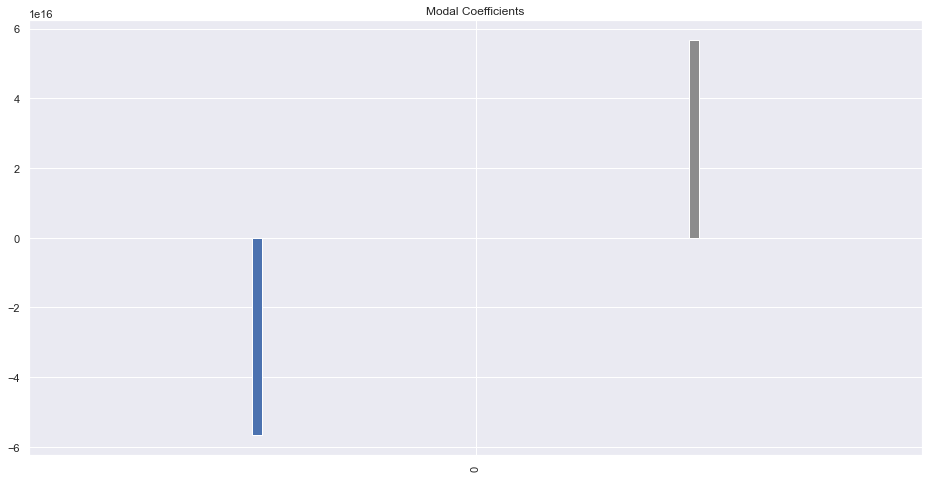

In [116]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [117]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 84382.13566557526
Testing Error: 142000.1467020259


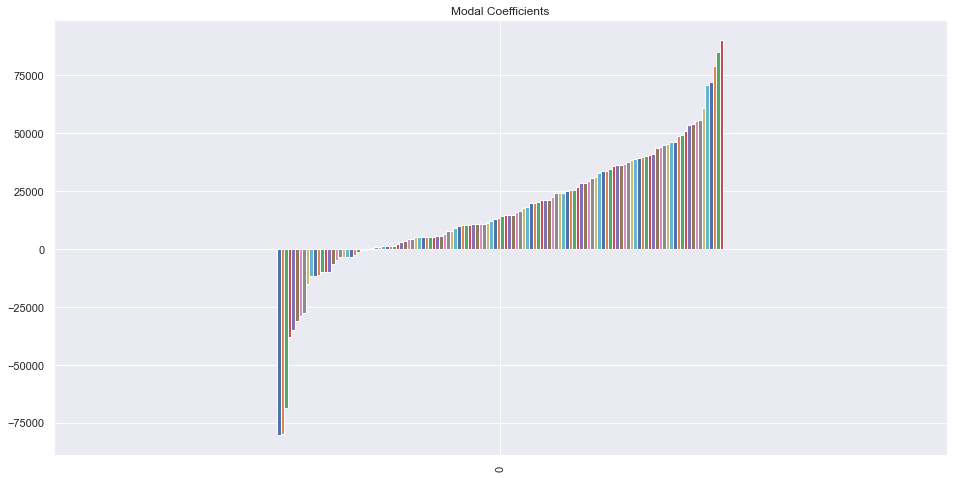

In [118]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [119]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    0
dtype: int64

In [120]:
coeff_df[coeff_df[0]==0]

,0


In [121]:
print('df_poly_cat: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

df_poly_cat: 	 142061.0148086801 
 KBest: 	 221126.29996596416 
 RFE: 	 	 156874.9357693936 
 Lasso 0.01: 	 142000.1467020259 



Based on model perfomance i will still use the poly nomial features alone. Although lass did have a sligh reduction in RMSE. I will still use the df_poly_cat features for the final dataset. 

## Final Model

In [122]:
final_scaler = StandardScaler()

scaled_data = final_scaler.fit_transform(df_poly_cat)

In [123]:
lasso = Lasso(alpha=10, normalize=False)

lasso.fit(scaled_data,working_DF_1['price'])

Lasso(alpha=10)

In [124]:
lasso.coef_

array([ 32215.44176914, -15057.97199348,  56947.65836764,  44866.91170591,
        -4822.61756187,  22636.8409435 ,  37667.54543789, -13524.4615523 ,
         -628.28700948, -69390.45915122,  13590.99656907,  -4868.60966676,
        12345.54006023,  -9199.42877506, -24117.49081995,  95462.03273531,
         9580.70926539,   9253.19960605,  27261.67408284,  25887.63929916,
        69465.50080202,  61565.2290927 , -13513.09538188,  16321.81551844,
       -69824.93359491, -69912.99319743, -16981.68299726,  23089.24144407,
        -4421.36822807,  24279.57986929,  36126.41041627, -13520.01613594,
       -35335.58959675, -10489.03949481,  21299.897155  ,  11391.21338492,
        12746.880427  ,  -2580.20631965, -10145.30954911,  10947.66389897,
         4035.9282063 ,  31593.94142657,  40571.60567381,  37888.49126545,
         -383.64895738,  -2989.93663486, -10495.64238482, -27948.85754781,
       -34517.21146902, -13986.68118047,  14777.76435291,  34531.35408493,
        39857.07392217,  

In [125]:
import pickle

pickle_out = open("model.pickle", "wb")
pickle.dump(lasso, pickle_out)
pickle_out.close()

In [126]:
pickle_out = open('scaler.pickle', "wb")
pickle.dump(scaled_data, pickle_out)
pickle_out.close()

In [127]:
scaled_data.shape

(17290, 124)